# Sport Analytics
This project focuses on analyzing soccer player performance metrics. Gain insights into how a player’s performance on the field can influence their market values on their matches played.

Final outcomes for project:
1. See what factors correlate with a higher market value?
2. See how market value changed over time and what could be the reasons?
3. See how many standard deviations of market value the top 5 players deviated from the average.
4. Identify the global distribution of market value and player citizenship.

## Data Importing

**Database** 1 imports: European Soccer Database: https://www.kaggle.com/datasets/abdelrhmanragab/european-soccer-database

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import scipy as sp
from scipy.stats import norm
from scipy import stats
import statistics
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter

import zipfile

!pip install altair==5.2.0
import altair as alt
alt.renderers.enable('default')

import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: altair
    Found existing installation: altair 4.2.2
    Uninstalling altair-4.2.2:
      Successfully uninstalled altair-4.2.2


Downloading the databases: The files were relatively small and downloading made it relatively easy to work with them on a shared environment like Google Colab. After downloading and extracting the files, they were stored in the same place for everyone on Google Colab, making it ideal for collaboration
as well as reproducibility.

In [2]:
#Downloading datasets, Will have to redo if kernel dies etc. Save locally if needed.
!kaggle datasets download -d abdelrhmanragab/european-soccer-database

Dataset URL: https://www.kaggle.com/datasets/abdelrhmanragab/european-soccer-database
License(s): unknown
 85% 23.0M/26.9M [00:00<00:00, 52.5MB/s]
100% 26.9M/26.9M [00:00<00:00, 55.1MB/s]


In [3]:
# Extracting the data
european_soccer_file = '/content/european-soccer-database.zip' # Can copy path from the file after refreshing.
with zipfile.ZipFile(european_soccer_file, 'r') as zipref:
  zipref.extractall('../content/') # Saving extracted file to new location. All files will appear under content(on google colab).

**Database** 2 imports: Football Data from davidcariboo: https://www.kaggle.com/datasets/davidcariboo/player-scores

In [4]:
#Downloading datasets, Will have to redo if kernel dies etc. Save locally if needed.
!kaggle datasets download -d davidcariboo/player-scores

Dataset URL: https://www.kaggle.com/datasets/davidcariboo/player-scores
License(s): CC0-1.0
 97% 149M/153M [00:02<00:00, 58.8MB/s]
100% 153M/153M [00:02<00:00, 61.4MB/s]


In [5]:
# Extracting the data
filename = '/content/player-scores.zip' # Can copy path from the file after refreshing.
with zipfile.ZipFile(filename, 'r') as zipref:
  zipref.extractall('../content/') # Saving extracted file to new location. All files will appear under content

___

## Data Cleaning


___

Player value data cleaning from the transfermarket datasets.
Final goal: To see what metrics correlate with player value?

**Dataset** 1 Data Cleaning

In [6]:
# Creating the player dataframe, checking the number of rows/columns, and checking the first 5 columns.
euro_player_df = pd.read_csv('/content/Player.csv')
print(f"Total player entries: {euro_player_df.shape[0]}")
print(f"Total columns/attributes: {euro_player_df.shape[1]}")
euro_player_df.head()

Total player entries: 11060
Total columns/attributes: 7


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [7]:
# Creating the player attribute dataframe, checking the number of rows/columns, and checking the first 5 columns.
euro_player_attr_df = pd.read_csv('/content/Player_Attributes.csv')
print(f"Total player entries: {euro_player_attr_df.shape[0]}")
print(f"Total columns/attributes: {euro_player_attr_df.shape[1]}")
euro_player_attr_df.head()

Total player entries: 183978
Total columns/attributes: 42


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [8]:
# Merging the player and attribute dataframes, checking columns and num entries.
euro_merged_df = pd.merge(euro_player_attr_df, euro_player_df, on='player_api_id', how='left')
print(euro_merged_df.columns)
print(f"Total player entries: {euro_merged_df.shape[0]}")
print(f"Total columns/attributes: {euro_merged_df.shape[1]}")

Index(['id_x', 'player_fifa_api_id_x', 'player_api_id', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'id_y', 'player_name', 'player_fifa_api_id_y',
       'birthday', 'height', 'weight'],
      dtype='object')
Total player entries: 183978
Total columns/attributes: 48


In [9]:
# Now we will test the dataframe by filtering it and making a visualization for Lionel Messi.
lionel_attributes_df = euro_merged_df[euro_merged_df["player_name"] == "Lionel Messi"].copy()
pd.to_datetime(lionel_attributes_df["date"]).dt.date # Changing column to Date type
lionel_attributes_df.head()

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
102482,102483,158023,30981,2015-12-17 00:00:00,94.0,94.0,left,medium,low,80.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102483,102484,158023,30981,2015-10-16 00:00:00,94.0,94.0,left,medium,low,80.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102484,102485,158023,30981,2015-09-21 00:00:00,94.0,95.0,left,medium,low,80.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102485,102486,158023,30981,2015-06-26 00:00:00,93.0,93.0,left,medium,low,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
102486,102487,158023,30981,2015-03-13 00:00:00,93.0,95.0,left,medium,low,84.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159


<ipython-input-10-8ffa2be5f522>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  lionel_plot.set_xticklabels(pd.to_datetime(lionel_attributes_df["date"]).dt.date,


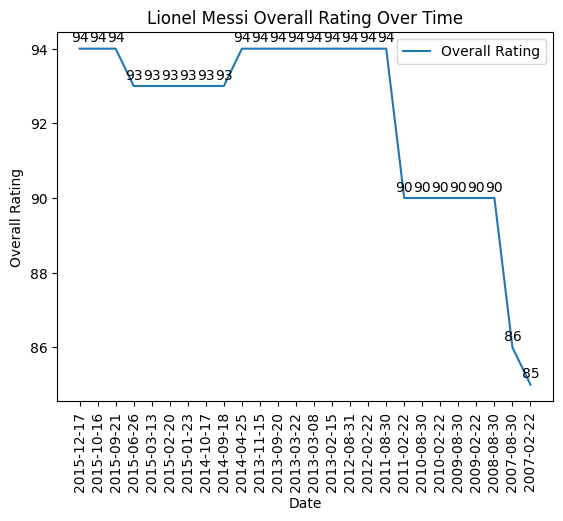

In [10]:
#Test line plot just to visualize the data

# Create the line plot
lionel_plot = sns.lineplot(x=lionel_attributes_df["date"],
                           y=lionel_attributes_df["overall_rating"],
                           label="Overall Rating")
lionel_plot.set_title("Lionel Messi Overall Rating Over Time")
lionel_plot.set_xlabel("Date")
lionel_plot.set_ylabel("Overall Rating")

# Set x-ticks and rotate for better visibility
lionel_plot.set_xticklabels(pd.to_datetime(lionel_attributes_df["date"]).dt.date,
                            rotation=90)

# Annotate each point with the score, formatted as an integer
for i in range(len(lionel_attributes_df)):
    lionel_plot.annotate(f'{int(lionel_attributes_df["overall_rating"].iloc[i])}',
                         (lionel_attributes_df["date"].iloc[i],
                          lionel_attributes_df["overall_rating"].iloc[i]),
                         textcoords="offset points",
                         xytext=(0,5),
                         ha='center')

# Show the plot
plt.show()

____

**Dataset** 2 Data Cleaning

In [11]:
# Creating the player dataframe and checking its length/contents.
df_player = pd.read_csv('/content/players.csv')
print(f'Total player entries: {len(df_player)}')
df_player.head()

Total player entries: 32404


,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [12]:
# Creating the valuation dataframe and checking its length/contents.
df_val = pd.read_csv('/content/player_valuations.csv')
print(f'Total valuation entries: {len(df_val)}')
df_val.head()

Total valuation entries: 486593


,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1


In [13]:
# The following look like they are not being used later on, please confirm and then we can remove this cell to avoid clutter.

# Grouping by club names

# First we will see how many and which clubs are present in the modified set.
club_names = df_player['current_club_name']
print(f'Total number of clubs in modified set: {len(club_names.unique())}')
print(f'All clubs in the set: {list(club_names.unique())}')

df_lineup = pd.read_csv('/content/game_lineups.csv')
print(f'Total player entries: {len(df_player)}')
df_lineup.head()

df_app = pd.read_csv('/content/appearances.csv')
print(f'Total appreance entries: {len(df_app)}')
df_app.head()

Total number of clubs in modified set: 437
All clubs in the set: ['Società Sportiva Lazio S.p.A.', 'Borussia Dortmund', 'Panthessalonikios Athlitikos Omilos Konstantinoupoliton', 'Juventus Football Club', 'FC Bayern München', 'Eskisehirspor', 'FC Schalke 04', 'Arsenal Football Club', 'Verein für Bewegungsspiele Stuttgart 1893', 'Málaga CF', 'FC Vestsjaelland', 'Levante UD', 'Kasımpaşa Spor Kulübü', 'Galatasaray Spor Kulübü', 'Eintracht Frankfurt Fußball AG', 'Hertha BSC', 'Swansea City', 'Sportverein Werder Bremen von 1899', 'FC Augsburg 1907', 'Borussia Verein für Leibesübungen 1900 Mönchengladbach', 'PFK Krylya Sovetov Samara', 'Reial Club Deportiu Espanyol de Barcelona S.A.D.', '1. Fußball- und Sportverein Mainz 05', 'Bayer 04 Leverkusen Fußball', 'US Livorno 1915', 'Antalyaspor', 'Thonon Évian Grand Genève FC', '1.FC Nuremberg', 'Kardemir Karabükspor', 'Fortuna Düsseldorf', 'Konyaspor', 'FK Dinamo Moskva', 'AO Xanthi', 'SpVgg Greuther Fürth', 'Hamburger SV', '1.FC Köln', 'Football 

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [14]:
# Combining valuation dataset with a filtered player one to make the df_combined that will be used for tasks later on.

df_player_new = df_player[['name', 'player_id', 'highest_market_value_in_eur']] # Filtering relevent columns.

df_combined = pd.merge(df_player_new, df_val, on='player_id')
df_combined.head()

,name,player_id,highest_market_value_in_eur,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,Miroslav Klose,10,30000000.0,2004-10-04,7000000,398,IT1
1,Miroslav Klose,10,30000000.0,2005-01-07,9000000,398,IT1
2,Miroslav Klose,10,30000000.0,2005-05-05,12000000,398,IT1
3,Miroslav Klose,10,30000000.0,2005-09-30,15000000,398,IT1
4,Miroslav Klose,10,30000000.0,2006-01-09,20000000,398,IT1


In [15]:
# Creating a function that will use df_combined to gibe market value history data of a given player.
def player_dataframe_extract(player, df=df_combined):
  player_dataframes = df_combined.groupby('name') # Grouping by name.
  player1_data = player_dataframes.get_group(player).copy() # Extracting information on a player.
  player1_data['date'] = pd.to_datetime(player1_data['date']) # Changing column type
  player_val_df = player1_data.sort_values('date')[['name', 'date', 'market_value_in_eur']]

  return player_val_df

Now that we have df_combined and player_dataframe_extract, we will use them to get valuation history on the top players (with the highest max market values).
___

In [16]:
# Checking available players by filtering the name column.
name_column = df_combined['name']
print(f'Total number of players in modified set: {len(name_column.unique())}')
print(f'All players in the set: {list(name_column.unique())}')

Total number of players in modified set: 30181
All players in the set: ['Miroslav Klose', 'Roman Weidenfeller', 'Dimitar Berbatov', 'Lúcio', 'Tom Starke', 'Dedê', 'Christoph Metzelder', 'Tomas Rosicky', 'Marc Ziegler', 'Roque Santa Cruz', 'Gerald Asamoah', 'Tamás Hajnal', 'Sladan Peric', 'Sérgio da Silva Pinto', 'Fabian Ernst', 'Tomas Ujfalusi', 'Benjamin Köhler', 'Sebastian Kehl', 'Levan Kobiashvili', 'Oka Nikolov', 'Gerhard Tremmel', 'Claudio Pizarro', 'Simon Jentzsch', 'Martin Stranzl', 'Aleksandr Hleb', 'Timo Hildebrand', 'Christian Vander', 'Martin Petrov', 'Ivan Klasnic', 'Simon Rolfes', 'Giuseppe Gemiti', 'Deniz Baris', 'David Jarolim', 'Hanno Balitsch', 'Selim Teber', 'Thorben Marx', 'Jens Langeneke', 'Heinz Müller', 'Ugur Inceman', 'Christian Weber', 'Manuel Friedrich', 'Andriy Voronin', 'Julian de Guzmán', 'Emanuel Pogatetz', 'Peer Kluge', 'Thomas Kleine', 'Sven Neuhaus', 'Matthias Lehmann', 'Nikolce Noveski', 'Christofer Heimeroth', 'Raphael Schäfer', 'Javier Zanetti', 'Pete

Next, we will identify the top 5 highest peak market values in the dataset(highest_market_value_in_eur). These are the top 5 soccer players we want to compare.

In [17]:
# Finding the top players when it comes to highest market value.
df_highest_val = df_combined[['name','player_id','highest_market_value_in_eur']] # Filtering columns.
df_highest_val = df_highest_val.drop_duplicates(subset = ['name']) # Since higest market value and player id are the same for all columns per name, we will drop duplicates.
df_highest_val = df_highest_val.sort_values(by=['highest_market_value_in_eur'], ascending=False) # Sorting by highest market value.
df_highest_val.head(10)

,name,player_id,highest_market_value_in_eur
412528,Erling Haaland,418560,200000000.0
376922,Kylian Mbappé,342229,200000000.0
141338,Neymar,68290,180000000.0
51367,Lionel Messi,28003,180000000.0
392855,Vinicius Junior,371998,180000000.0
453524,Jude Bellingham,581678,180000000.0
221421,Raheem Sterling,134425,160000000.0
219949,Harry Kane,132098,150000000.0
100688,Eden Hazard,50202,150000000.0
282180,Sadio Mané,200512,150000000.0


In [18]:
# Using player_dataframe_extract function created earlier to extract the valuation history of the top 5 players from the previous cell.
messi_val_df = player_dataframe_extract('Lionel Messi')
mbappe_val_df = player_dataframe_extract('Kylian Mbappé')
haaland_val_df = player_dataframe_extract('Erling Haaland')
vinijr_val_df = player_dataframe_extract('Vinicius Junior')
bellingham_val_df = player_dataframe_extract('Jude Bellingham')
messi_val_df.head() # Checking Messi's valuation history dataframe.

,name,date,market_value_in_eur
51367,Lionel Messi,2004-12-20,3000000
51368,Lionel Messi,2005-12-28,5000000
51369,Lionel Messi,2006-01-20,15000000
51370,Lionel Messi,2007-07-26,40000000
51371,Lionel Messi,2007-09-12,60000000


___
Normal distribution and t-test related data cleaning

In [19]:
# Extracting highest market values of players
def highest_market_vals(df=df_combined, state=None):
  df = df[['name', 'highest_market_value_in_eur']]
  df = df.groupby('name').first()
  df = df.reset_index()
  df.columns = ['Name', 'Highest_Market_Value(EUR)']

  return df.sample(4000, random_state=state)

print(len(highest_market_vals()))
highest_market_vals(state=0) # For reproducibility, set state to 0.

4000


,Name,Highest_Market_Value(EUR)
14663,Julen Etxabeguren,200000.0
21295,Nicolás Domínguez,17500000.0
5443,Corrie Ndaba,350000.0
19565,Mica,150000.0
4114,Bradley Martis,50000.0
...,...,...
3468,Barreto,8000000.0
1603,Alp Efe Kılınç,50000.0
21732,Norbert Gyömbér,1500000.0
22438,Ozan Özenc,800000.0


___
## Analysis and Visualizations
___

**Valuation history plot of top players**

**First** we will plot top 5 most valuable players and their average market value each year on one line graph area. We use data from the years 2019 to 2024 since all 5 players have stats in these years for comparison.

In [20]:
# Creating one dataframe that will contain data for all 5 top players.
df_top5 = pd.concat([messi_val_df,mbappe_val_df,
                     haaland_val_df,vinijr_val_df,bellingham_val_df], axis=0) # Combining the valuation data for the top 5 players.

df_top5['date'] = pd.to_datetime(df_top5['date']) # Changing data type to DateTime and filtering. Setting and resetting index
df_top5 = df_top5[(df_top5['date'] >= "2019-01-01") & (df_top5['date'] <= "2024-01-01")] # helps to organize and average.
df_top5.set_index('date', inplace=True)
df_top5.index = pd.to_datetime(df_top5.index)
yearly_df = df_top5.groupby('name').resample('YE').mean() # get averages by year
yearly_df.reset_index(inplace=True)

yearly_df.head()

,name,date,market_value_in_eur
0,Erling Haaland,2019-12-31,23000000.0
1,Erling Haaland,2020-12-31,78400000.0
2,Erling Haaland,2021-12-31,135000000.0
3,Erling Haaland,2022-12-31,160000000.0
4,Erling Haaland,2023-12-31,180000000.0


<Figure size 640x480 with 0 Axes>

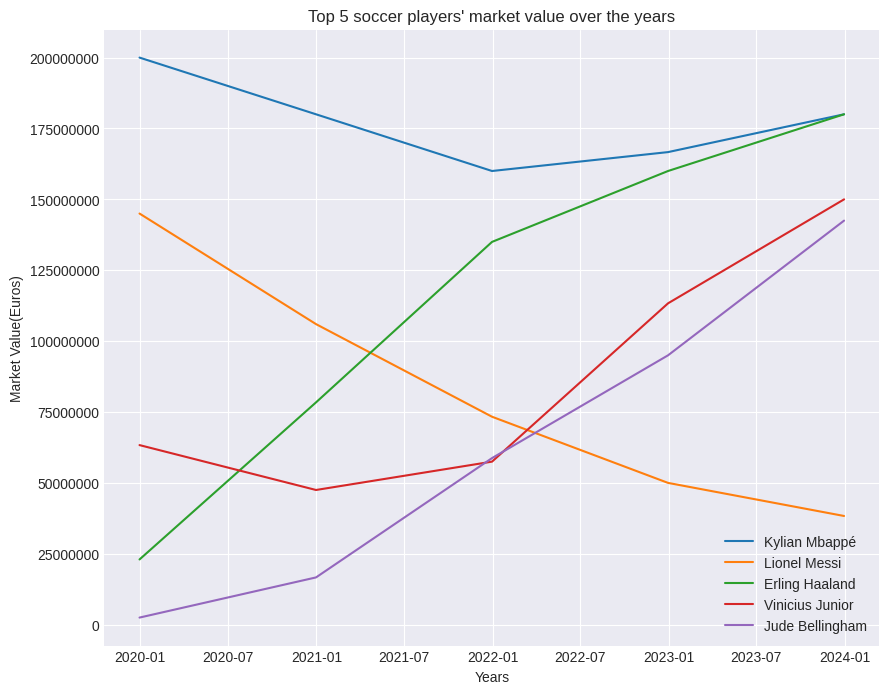

In [21]:
# Creating a function that will create the visualization for the player valuation history.
def top5_valuation(df):
  plt.clf()
  plt.style.use('seaborn-v0_8-darkgrid') # Setting the style and size of the plot.
  plt.figure(figsize=(10, 8))

  players = ['Kylian Mbappé','Lionel Messi','Erling Haaland','Vinicius Junior','Jude Bellingham'] # Top players from earlier.
  # Creating a filtered dataframe for each player and plotting it.
  for player in players:
    player_data = df[df['name'] == player]
    plt.plot(player_data['date'], player_data['market_value_in_eur'], label=player)

  # Formatting the chart.
  plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
  plt.gca().yaxis.get_major_formatter().set_scientific(False)
  plt.title(f"Top 5 soccer players' market value over the years")
  plt.xlabel("Years")
  plt.ylabel("Market Value(Euros)")
  plt.legend()

  plt.show()

top5_valuation(yearly_df)

**Player metrics vs. peak market value scatter plots**

**Next**, we will plot a series of player metrics vs. peak market value scatter plots. We will be including a linear correlation line so the trend can be identified more easily. The metrics of interest are: overall rating, penalties, free kick accuracy, acceleration, and ball control.

In [22]:
# Sampling: Get a large sample size like 2000 since some players are missing in 2nd dataset.
# Copying and dropping duplicates.
top_attributes_df = euro_merged_df.copy()
top_attributes_df.drop_duplicates(subset = ['player_name'],inplace=True)

# Sorting and filtering columns.
df_top_ratings = top_attributes_df.sort_values(by=['overall_rating'], ascending=False)
df_top_ratings = df_top_ratings[['player_name','date','overall_rating','penalties','free_kick_accuracy','acceleration','ball_control']]
df_top_ratings = df_top_ratings.sample(2000, random_state=0) # Setting random state to 0 for reproducibility.
df_top_ratings

,player_name,date,overall_rating,penalties,free_kick_accuracy,acceleration,ball_control
176784,Victor Hugo Montano,2015-07-03 00:00:00,67.0,70.0,51.0,74.0,63.0
25006,Callum Wilson,2015-09-25 00:00:00,75.0,75.0,45.0,93.0,75.0
130850,Nelson Barbosa,2016-01-21 00:00:00,67.0,46.0,33.0,76.0,67.0
34593,Dani Hernandez,2016-05-12 00:00:00,73.0,25.0,12.0,34.0,15.0
137592,Pablo Andres Gonzalez,2015-11-12 00:00:00,72.0,76.0,62.0,82.0,72.0
...,...,...,...,...,...,...,...
181961,Yoell van Nieff,2016-02-04 00:00:00,65.0,73.0,86.0,65.0,66.0
142868,Petr Cech,2016-01-28 00:00:00,86.0,23.0,19.0,45.0,22.0
25207,Cameron Smith,2016-04-28 00:00:00,63.0,57.0,28.0,73.0,67.0
41931,Dede,2011-02-22 00:00:00,75.0,67.0,74.0,74.0,82.0


In [23]:
#1st dataset and cleaning
df_top_ratings['date'] = pd.to_datetime(df_top_ratings['date'])
df_top_ratings.set_index('date', inplace=True)
df_top_ratings.index = pd.to_datetime(df_top_ratings.index)

yearly_df_ratings = df_top_ratings.groupby('player_name').resample('YE').mean() #get averages by year
yearly_df_ratings.reset_index(inplace=True)
yearly_df_ratings.rename(columns = {'player_name':'name'}, inplace=True)

yearly_df_ratings.head()

,name,date,overall_rating,penalties,free_kick_accuracy,acceleration,ball_control
0,Aaron Appindangoye,2016-12-31,67.0,48.0,39.0,60.0,49.0
1,Aaron Hughes,2015-12-31,70.0,45.0,25.0,33.0,58.0
2,Aaron Kuhl,2016-12-31,61.0,42.0,40.0,69.0,63.0
3,Aaron Lennon,2015-12-31,77.0,62.0,55.0,89.0,81.0
4,Aaron Meijers,2015-12-31,69.0,56.0,67.0,75.0,74.0


In [24]:
#2nd dataset and cleaning
df_market_value = df_combined.copy()
df_market_value = df_market_value[['name','date','highest_market_value_in_eur']]

df_market_value = df_market_value.sample(2000, random_state=42)
df_market_value['date'] = pd.to_datetime(df_market_value['date'])
df_market_value.set_index('date', inplace=True)
df_market_value.index = pd.to_datetime(df_market_value.index)

yearly_df_market = df_market_value.groupby('name').resample('YE').mean() #get averages by year
yearly_df_market.reset_index(inplace=True)
yearly_df_market

,name,date,highest_market_value_in_eur
0,Aaron Muirhead,2021-12-31,275000.0
1,Aaron Ramsey,2011-12-31,45000000.0
2,Aaron Ramsey,2012-12-31,NaN
3,Aaron Ramsey,2013-12-31,NaN
4,Aaron Ramsey,2014-12-31,NaN
...,...,...,...
2263,Óscar Díaz,2017-12-31,1200000.0
2264,Ömer Akyörük,2013-12-31,100000.0
2265,Ömer Toprak,2017-12-31,20000000.0
2266,İlker Karakaş,2022-12-31,300000.0


In [25]:
#merging the 1st and 2nd cleaned datasets
df_metrics = pd.merge(yearly_df_ratings, yearly_df_market, on='name',how='inner')
df_metrics.drop_duplicates(subset = ['name'], inplace=True)

df_metrics = df_metrics[['name','date_x','overall_rating','penalties','free_kick_accuracy','acceleration','ball_control','highest_market_value_in_eur']]
df_metrics.rename(columns = {'date_x':'date'}, inplace=True) # Renaming column

df_metrics

,name,date,overall_rating,penalties,free_kick_accuracy,acceleration,ball_control,highest_market_value_in_eur
0,Adem Ljajic,2016-12-31,79.0,76.0,76.0,82.0,85.0,15000000.0
1,Adis Jahovic,2016-12-31,69.0,63.0,35.0,60.0,69.0,1750000.0
2,Alberto Bueno,2016-12-31,76.0,68.0,69.0,66.0,80.0,7500000.0
3,Anco Jansen,2014-12-31,65.0,49.0,67.0,64.0,72.0,700000.0
4,Andre Hoffmann,2015-12-31,75.0,42.0,31.0,61.0,62.0,5000000.0
...,...,...,...,...,...,...,...,...
123,Timo Gebhart,2016-12-31,69.0,69.0,70.0,73.0,73.0,5000000.0
124,Tom Starke,2015-12-31,75.0,21.0,15.0,42.0,19.0,3000000.0
125,Wayne Rooney,2016-12-31,85.0,81.0,84.0,72.0,83.0,65000000.0
126,Wojciech Pawlowski,2015-12-31,64.0,32.0,25.0,32.0,23.0,700000.0


In [26]:
def metric_vs_value_subplot(ax, df, x_axis, x_axis_label):
    # Use seaborn regplot to add scatter plot and regression line to the given axis
    sns.regplot(x=df[x_axis],
                y=df["highest_market_value_in_eur"],
                scatter_kws={'color': 'blue'},
                line_kws={'color': 'red', 'label': 'Regression Line'},
                ax=ax)

    ax.set_title(f"{x_axis_label} vs. Highest Market Value")
    ax.set_xlabel(x_axis_label)
    ax.set_ylabel("Market Value (Euros)")

    # Format y-axis to show actual number, no scientific notation
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax.yaxis.get_major_formatter().set_scientific(False)

    ax.set_ylim([0, None])
    ax.legend()

    # Calculate regression statistics
    corr_coeff = df[x_axis].corr(df['highest_market_value_in_eur'])
    p_value = stats.pearsonr(df[x_axis], df['highest_market_value_in_eur'])[1]
    r_squared = corr_coeff**2

    # Add the statistics as text to the subplot
    ax.text(0.05, 0.85, f"Corr Coeff: {corr_coeff:.2f}\nP-Value: {p_value:.2e}\nR-Squared: {r_squared:.2f}",
            transform=ax.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

In [27]:
metrics = [
    ("ball_control", "Ball Control"),
    ("acceleration", "Acceleration"),
    ("free_kick_accuracy", "Free Kick Accuracy"),
    ("penalties", "Penalties Rating"),
    ("overall_rating", "Overall Rating")
]

# Function to plot all scatter plots in a 3x2 grid
def plot_all_metrics_in_grid(df, metrics):
    fig, axs = plt.subplots(3, 2, figsize=(12, 18))
    plt.style.use('seaborn-v0_8-darkgrid')

    # Loop through the metrics and plot them on the subplots
    for ax, (x_axis, x_axis_label) in zip(axs.ravel(), metrics):
        metric_vs_value_subplot(ax, df, x_axis, x_axis_label)

    # If there are unused subplots, hide them
    for i in range(len(metrics), len(axs.ravel())):
        axs.ravel()[i].axis('off')

    # Adjust spacing between subplots
    fig.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1, hspace=0.2, wspace=0.3)

    plt.show()


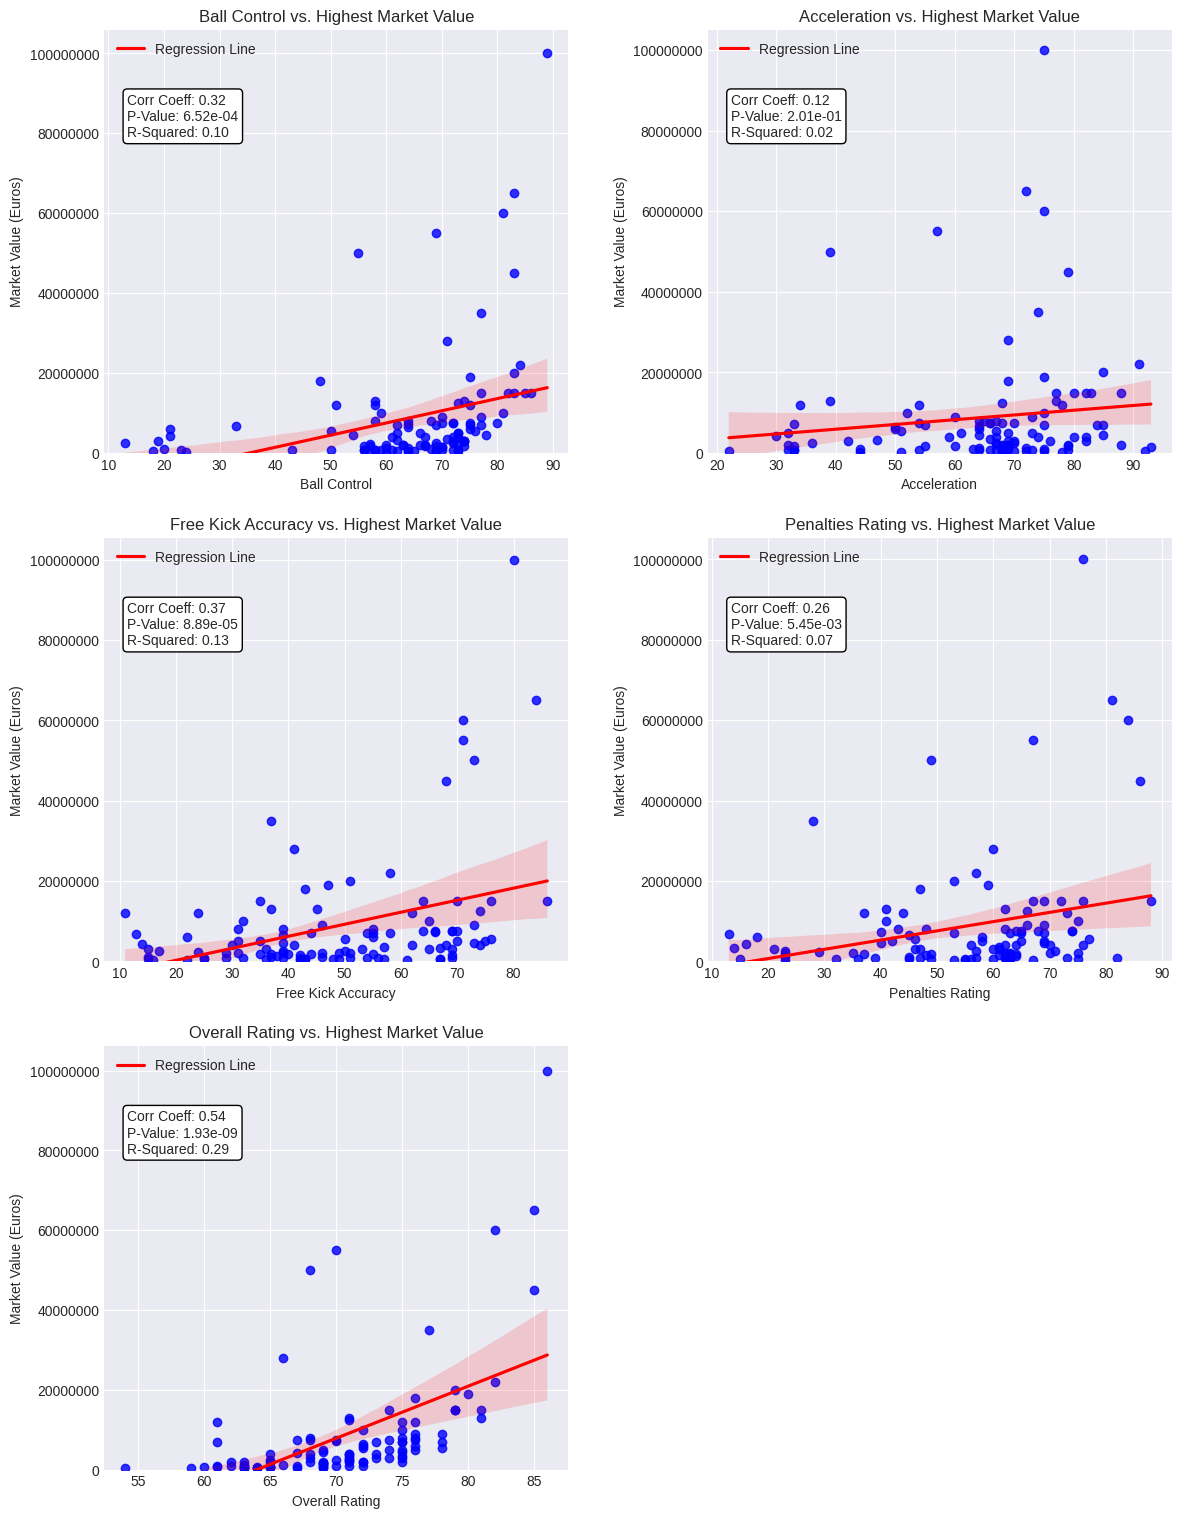

In [28]:
plot_all_metrics_in_grid(df_metrics, metrics)

____
Next we will remove outliers using the InterQuartile Range from the dataset and retest the scatterplots to see the changes in the Correlation Coefficient, P-Value and R-Squared Value

In [29]:
#Function to remove outliers using Interquartile Range (IQR) method
#Values outside IQR 1.5 * the 1st and 3rd IQR are removed
def remove_outliers_iqr(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of values below lower bound and above upper bound
    lower_outliers_count = (df[column] < lower_bound).sum()
    upper_outliers_count = (df[column] > upper_bound).sum()

    # Print the count of outliers
    print(f"Number of values removed below lower bound ({lower_bound}): {lower_outliers_count}")
    print(f"Number of values removed above upper bound ({upper_bound}): {upper_outliers_count}")

    # Filter the DataFrame to remove outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_no_outliers


**Remove Outliers from the dataset, to see if it improves the Scores.**

In [30]:
df_cleaned = remove_outliers_iqr(df_metrics, 'highest_market_value_in_eur')

Number of values removed below lower bound (-8250000.0): 0
Number of values removed above upper bound (17750000.0): 12


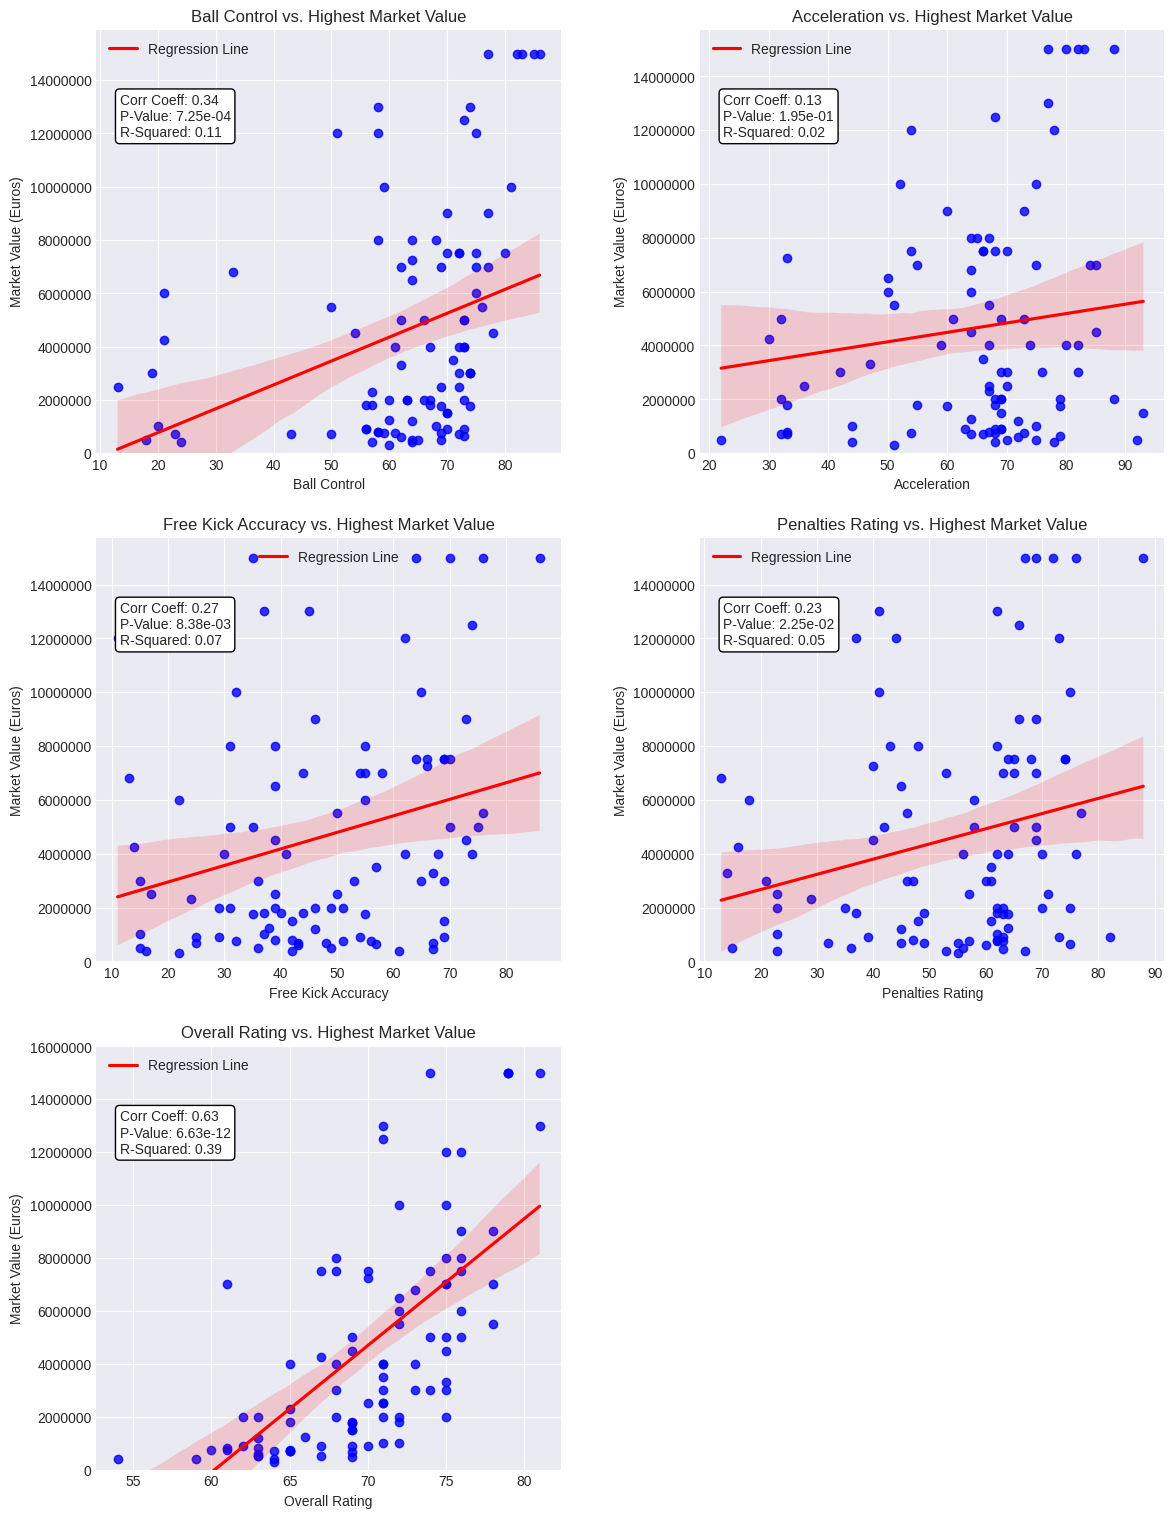

In [31]:
#All Charts with outliers removed
plot_all_metrics_in_grid(df_cleaned, metrics)

____
**Distribution and t-test related analysis**

Next, plot a density plot of the distribution of player max evaluations (highest market values). To generate this density plot, we start with a histogram and use Altair's transform_density() function to convert it into a density plot. Include a population mean line and a mean line of the top 100 players for comparison, and layer them onto the final chart.

In [32]:
# Finding the mean and standard deviation of the market values
highest_MV_mean = highest_market_vals()['Highest_Market_Value(EUR)'].mean()
highest_MV_std = highest_market_vals()['Highest_Market_Value(EUR)'].std()
print("The mean highest market value is: ", highest_MV_mean)
print("The standard deviation of highest market value is: ",highest_MV_std)

The mean highest market value is:  3917331.25
The standard deviation of highest market value is:  8520923.873411678


In [33]:
highest_market_vals()

,Name,Highest_Market_Value(EUR)
22313,Osama Rashid,2000000.0
1856,Andile Jali,2000000.0
16628,Lorenzo Benucci,125000.0
4767,Cebrail Karayel,1000000.0
26842,Sébastien Haller,45000000.0
...,...,...
8241,Emmerson Boyce,3500000.0
19737,Michel Morganella,1200000.0
3042,Arthur Desmas,2500000.0
4904,Cheick Keita,1250000.0


In [34]:
# Density graph of how much the top players deviate from the average evaluation
df = highest_market_vals()

pop_hist_chart = alt.Chart(df).mark_bar().encode(
    alt.X("Highest_Market_Value(EUR)", bin=alt.Bin(maxbins=100),
          title="Highest Market Value (Euros)",
          axis=alt.Axis(tickSize=9, labelFontSize=12, labelFontWeight=500),
        # set the x axis limits to be from 0 to 70000000
        # so that it is easier to compare across visualizations.
        scale=alt.Scale(domain=[0,70000000])
    ),
    y=alt.Y('count()', title="Count",
            axis=alt.Axis(tickSize=9, labelFontSize=12, labelFontWeight=500))
).properties(
    title = alt.TitleParams(
        text = "Histogram of Highest Market Values in Euros",
        fontSize = 16,
        fontWeight = 'bold',
        anchor = 'middle', #align the chart title
        dy = -10 # Offset the title and subtitle 10 pixels above the rest of the chart
    )
).properties(
    width=400,
    height=400
).configure_axis(
    grid = False # Hide the grid lines
)

pop_hist_chart

alt.Chart(...)

In [35]:
pop_density_chart = alt.Chart(df).transform_density(
     density='Highest_Market_Value(EUR)',
     as_=['Highest_Market_Value(EUR)', 'density'],

 ).mark_area(color="lightblue").encode(
     x=alt.X('Highest_Market_Value(EUR)', axis=alt.Axis(title="Distribution of Player Max Evaluations(EUR)",
                                                        tickSize=9, labelFontSize=12, labelFontWeight=500)),
     y=alt.Y('density:Q', axis=alt.Axis(title="Density",tickSize=9, labelFontSize=12, labelFontWeight=500))
 )

pop_density_chart

alt.Chart(...)

In [36]:
# Dataframe with top 100 players
df_top100maxvals = highest_market_vals().sort_values('Highest_Market_Value(EUR)', ascending=False).head(100)

pop_mean_chart = alt.Chart(df).mark_rule(color="black", strokeDash=[5,1]).encode(
    x=alt.X('mean(Highest_Market_Value(EUR))',
            axis=alt.Axis(tickSize=9, labelFontSize=12, labelFontWeight=500))
)

top_100_mean_chart = alt.Chart(df_top100maxvals).mark_rule(color="red", strokeDash=[5,1]).encode(
    x=alt.X('mean(Highest_Market_Value(EUR))',
            axis=alt.Axis(tickSize=9, labelFontSize=12, labelFontWeight=500))
)

pop_density_chart + pop_mean_chart + top_100_mean_chart.properties(
    title = alt.TitleParams(
        text = "Density Plot of Distribution of Player Max Evaluations",
        fontSize = 16,
        fontWeight = 'bold',
        anchor = 'middle', #align the chart title
        subtitle = 'With Population Mean Line(Black) and Top 100 Player Mean Line(Red)',
        subtitleFontSize = 14,
        subtitleFontWeight = 500,
        dy = -10 # Offset the title and subtitle 10 pixels above the rest of the chart
    )
).properties(
    width=400,
    height=400
)

alt.LayerChart(...)

In [37]:
t_st, p_val = stats.ttest_1samp(highest_market_vals()['Highest_Market_Value(EUR)'], df_top100maxvals['Highest_Market_Value(EUR)'].mean())
print(f"The t test when comparing the population mean and top 100 player's max vals is {t_st}, the p value is {p_val}")

The t test when comparing the population mean and top 100 player's max vals is -356.5564234527733, the p value is 0.0


___
**Choropleth Map**

Lastly, create a choropleth map using Plotly that visualizes the global distribution of soccer player market values based on their country of citizenship.

In [38]:
## Country Corrections for Map Plot
corrections = {
    'East Germany (GDR)': 'Germany',
    'CSSR': 'Czechoslovakia',
    'UdSSR': 'Soviet Union',
    'Jugoslawien (SFR)': 'Yugoslavia',
    "Cote d'Ivoire": "Ivory Coast",
    'Zaire': 'Democratic Republic of the Congo',
    'Korea, South': 'South Korea',
    'Tahiti': 'French Polynesia',
    'Réunion': 'Reunion',
    'French Guiana': 'France',
    'Guadeloupe': 'France',
    'The Gambia': 'Gambia',
    'Cape Verde': 'Cabo Verde',
    'Martinique': 'France',
    'Netherlands Antilles': 'Curacao',
    'Guinea-Bissau': 'Guinea Bissau',
    'People\'s republic of the Congo': 'Republic of the Congo',
    'Türkiye': 'Turkey',
    'Yugoslavia (Republic)': 'Yugoslavia',
    'Mayotte': 'France',
    'Swaziland': 'Eswatini',
    'DR Congo': 'Democratic Republic of the Congo',
    'Neukaledonien': 'New Caledonia',
    'Hongkong': 'Hong Kong',
    'Sint Maarten': 'Netherlands',
    'Korea, North': 'North Korea',
    'Serbia and Montenegro': 'Serbia',
    'Curacao': 'Netherlands',
    'Congo': 'Republic of the Congo',
    'Macao': 'Macau',
    'Crimea': 'Ukraine',
    'Isle of Man': 'United Kingdom',
    'Jersey': 'United Kingdom',
    'Guernsey': 'United Kingdom',
    'Palestine': 'State of Palestine',
    'Saint Lucia': 'St. Lucia',
    'Trinidad and Tobago': 'Trinidad & Tobago',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
    'Sao Tome and Principe': 'Sao Tome & Principe',
    'United States': 'United States of America',
    'England': 'United Kingdom',
    'Wales': 'United Kingdom',
    'Scotland': 'United Kingdom',
    'Northern Ireland': 'United Kingdom',
    'Czech Republic': 'Czechia',
}

### Clean Player Country of Citizenship
df_player["country_of_citizenship"] = df_player["country_of_citizenship"].replace(corrections)
aggregated_country_marketvalue = df_player.groupby('country_of_citizenship', as_index=False).agg({
    'market_value_in_eur': 'sum'
})

# Define a custom color scale with white for 0 values, to better distinguish between countries with and without values
custom_color_scale = [
    [0.0, 'white'],
    [0.1, 'lightblue'],
    [0.2, 'blue'],
    [0.4, 'darkblue'],
    [0.6, 'navy'],
    [0.8, 'midnightblue'],
    [1.0, 'black']
]

fig = px.choropleth(
    aggregated_country_marketvalue,
    locations='country_of_citizenship',
    locationmode='country names',
    color='market_value_in_eur',
    hover_name='country_of_citizenship',
    hover_data={'market_value_in_eur': ':.2f'},
    color_continuous_scale=custom_color_scale,
    labels={'market_value_in_eur': 'Total Market Value (€)'},
    title='Global Distribution of Football Player Market Value'
)

fig.update_layout(
    title={
        'text': 'Global Distribution of Football Player Market Value and Player Citizenship',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor="DarkSlateGray",
        projection_type='equirectangular',
        showland=True,
        landcolor="white",
        showcountries=True
    ),
    coloraxis_colorbar=dict(
        title="Total Market Value (€)",
        ticksuffix=' €',
        lenmode='fraction',
        len=0.75
    ),
    margin=dict(l=0, r=0, t=60, b=0),
    autosize=True,
    height=600,
    width=1700
)

fig.show()


## Dependencies for this Notebook

In [39]:
!pip install watermark

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [40]:
%load_ext watermark
print('Dependencies: \n')
%watermark -v -m -p pandas,numpy,matplotlib,seaborn,sqlite3,altair

Dependencies: 

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

pandas    : 2.2.2
numpy     : 1.26.4
matplotlib: 3.7.1
seaborn   : 0.13.1
sqlite3   : 2.6.0
altair    : 5.2.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

